In [5]:

#インポートエリア
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

image2 = cv2.imread('nimotsu_output3.jpg')
image1 = cv2.imread('empty_output3.jpg')
image3 = cv2.imread('empty_output3.jpg')

img_size = (100, 100)

# # 画像をリサイズする
# image1 = cv2.resize(image1, img_size)
# image2 = cv2.resize(image2, img_size)
# image3 = cv2.resize(image3, img_size)

print(np.count_nonzero(image1 == image2) / image1.size)
print(np.count_nonzero(image1 == image3) / image1.size)
# 1.0
# 0.46696666666666664

0.07040984783232845
1.0


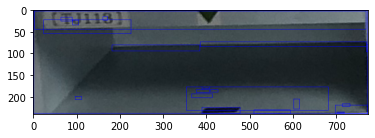

In [10]:
"""
画像比較して異なる箇所を赤枠で囲む
"""

import cv2
import os
import numpy as np



#画像読み込み
img_2 = cv2.imread('nimotsu_output3.jpg')
img_1 = cv2.imread('empty_output3.jpg')

height = img_2.shape[0]
width = img_2.shape[1]

img_1 = cv2.resize(img_1 , (int(width), int(height)))

img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

#画像を引き算
img_diff = cv2.absdiff(img_1_gray, img_2_gray)

#2値化
ret2,img_th = cv2.threshold(img_diff,20,255,cv2.THRESH_BINARY)

#輪郭を検出
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#閾値以上の差分を四角で囲う
for i,cnt in enumerate(contours):
    x, y, width, height = cv2.boundingRect(cnt)
    if width > 10 or height > 10:
        cv2.rectangle(img_1, (x, y), (x+width, y+height), (0, 0, 255), 1)

#画像を生成
plt.imshow(img_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


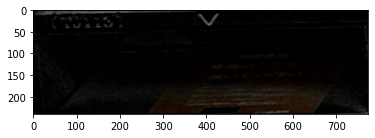

In [35]:
"""
画像比較して異なる箇所を別画像で表示
↓を参考に
https://note.nkmk.me/python-opencv-numpy-image-difference/
"""

import cv2
import os
import numpy as np



#画像読み込み
img_2 = cv2.imread('nimotsu_output3.jpg')
img_1 = cv2.imread('empty_output3.jpg')
# img_2 = cv2.imread('empty_output3.jpg')

height = img_1.shape[0]
width = img_1.shape[1]

img_size = (int(width), int(height))

# # 画像をリサイズする
image1 = cv2.resize(img_1, img_size)
image2 = cv2.resize(img_2, img_size)

# ２画像の差異を計算
import math
im_diff = image1.astype(int) - image2.astype(int)
plt.imshow(im_diff)
# # 単純に差異をそのまま出力する
# imwrite(dirname + '/output/01_diff.png', im_diff)

# # 差異が無い箇所を中心（灰色：128）とし、そこからの差異を示す
# imwrite(dirname + '/output/02_diff_center.png', im_diff + 128)

# # 差異が無い箇所を中心（灰色：128）とし、差異を2で割った商にする（差異を-128～128にしておきたいため）
# im_diff_center = np.floor_divide(im_diff, 2) + 128
# imwrite(dirname + '/output/03_diff_center.png', im_diff_center)

In [60]:
# np.count_nonzero(im_diff)
# 0
# 518042
# 557280
im_diff[0]
print(im_diff.sum())
print(np.abs(im_diff).sum())
print(im_diff.size)
print(im_diff.size * 255)

#変化総量　要素ごとの　BGRの値を足し合わせる
# ブランク画像
blank = np.zeros((height, width, 3))
blank += 255 #←全ゼロデータに255を足してホワイトにする
print(blank.sum())
print((np.abs(im_diff).sum()) / (im_diff.size * 255))

1263941
5586955
557280
142106400
142106400.0
0.03931529473690137


array([[ 1,  0,  1],
       [ 2,  1,  1],
       [-1,  0, -1],
       ...,
       [ 0,  0,  0],
       [-1,  0, -1],
       [-1,  0, -1]])